<a href="https://colab.research.google.com/github/HanPeizhi/Decision-Tree-Classification-on-PCA/blob/main/CS831_Project_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

上传表格到谷歌云盘根目录下，然后在Colab里打开

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer.csv to Breast Cancer (2).csv


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


导入表格：

In [ ]:
df = pd.read_csv('Breast Cancer.csv')

数据的一些信息：

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 预处理：

1. 无missing value
2. 去outlier。用clustering?
3. 去noise data。如何找？
4. 把所有的attribute转换成categorical data？
a. "sex" “cp”,"slope", "thal", 换成文字, 级别，或者类别;
b. "age", "trestbps", "chol", "thalach" "oldpeak" 按照数字的范围分组？
c. “target” 和其他有1，0的，都变成yes or no / true or false

4.a: 根据UCI的信息，把这些attributes换成categorical

In [ ]:
new_df = pd.get_dummies(df, drop_first=True)

In [ ]:
new_df.index = np.arange(1, len(new_df) + 1) #让序号从1开始表示

In [ ]:
new_df.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
#new_df.to_csv(r'heart-after_preprocessing.csv') #存进表格

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [ ]:
# Library for data splitting
from sklearn.model_selection import train_test_split 

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('diagnosis_M', 1),   # delet the label
                                                    new_df['diagnosis_M'],           # label set    
                                                    test_size = .2,                 # test size 20%, train size 80% 
                                                    random_state = 4)               # random seed, same seed same output
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
341,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,0.3491,0.7706,2.677,32.140,0.004577,0.03053,0.03840,0.012430,0.01873,0.003373,16.67,21.51,111.40,862.1,0.12940,0.3371,0.3755,0.14140,0.3053,0.08764
383,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,0.1194,1.4340,1.778,9.549,0.005042,0.04560,0.04305,0.016670,0.02470,0.007358,12.57,28.71,87.36,488.4,0.08799,0.3214,0.2912,0.10920,0.2191,0.09349
301,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,1.1110,1.1610,7.237,133.000,0.006056,0.03203,0.05638,0.017330,0.01884,0.004787,25.93,26.24,171.10,2053.0,0.14950,0.4116,0.6121,0.19800,0.2968,0.09929
263,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,0.8348,1.6330,6.146,90.940,0.006717,0.05981,0.04638,0.021490,0.02747,0.005838,20.39,27.24,137.90,1295.0,0.11340,0.2867,0.2298,0.15280,0.3067,0.07484
364,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.580,0.007257,0.01805,0.01832,0.010330,0.01694,0.002001,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.160,0.009327,0.05121,0.08958,0.024650,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.15360,0.4167,0.7892,0.27330,0.3198,0.08762
542,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,1.0790,2.615,23.110,0.007138,0.04653,0.03829,0.011620,0.02068,0.006111,16.22,31.73,113.50,808.9,0.13400,0.4202,0.4040,0.12050,0.3187,0.10230
380,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.06367,0.2196,0.07950,0.2114,1.0270,1.719,13.990,0.007405,0.04549,0.04588,0.013390,0.01738,0.004435,13.24,32.82,91.76,508.1,0.21840,0.9379,0.8402,0.25240,0.4154,0.14030
330,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,0.5706,1.4570,2.961,57.720,0.010560,0.03756,0.05839,0.011860,0.04022,0.006187,17.73,25.21,113.70,975.2,0.14260,0.2116,0.3344,0.10470,0.2736,0.07953


In [ ]:
# Decision Trees Library
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

[Text(178.56, 206.56799999999998, 'X[22] <= 105.95\ngini = 0.476\nsamples = 455\nvalue = [277, 178]'),
 Text(111.60000000000001, 184.824, 'X[27] <= 0.159\ngini = 0.097\nsamples = 275\nvalue = [261, 14]'),
 Text(81.84, 163.07999999999998, 'X[28] <= 0.157\ngini = 0.051\nsamples = 267\nvalue = [260, 7]'),
 Text(66.96000000000001, 141.336, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(96.72, 141.336, 'X[24] <= 0.178\ngini = 0.044\nsamples = 266\nvalue = [260, 6]'),
 Text(59.52, 119.592, 'X[13] <= 48.975\ngini = 0.03\nsamples = 262\nvalue = [258, 4]'),
 Text(29.76, 97.848, 'X[21] <= 30.145\ngini = 0.023\nsamples = 259\nvalue = [256, 3]'),
 Text(14.88, 76.10399999999998, 'gini = 0.0\nsamples = 232\nvalue = [232, 0]'),
 Text(44.64, 76.10399999999998, 'X[22] <= 101.35\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(29.76, 54.360000000000014, 'X[20] <= 14.43\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(14.88, 32.615999999999985, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 

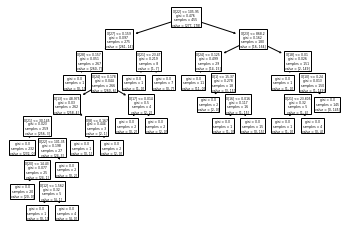

In [ ]:
clf = tree.DecisionTreeClassifier()         # criterion='entropy', min_samples_leaf=10
clf = clf.fit(x_train, y_train)             # 拟合训练
tree.plot_tree(clf.fit(x_train, y_train))   # 决策边界

In [ ]:
# 使用库函数来计算准确率
predTree = clf.predict(x_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9035087719298246


In [ ]:
predTree

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0], dtype=uint8)

In [ ]:
# 自己实现计算准确率

testset = clf.predict(x_test)   # 预测和结果
# 计算准确率
correct = 0
for i, k in zip(testset, y_test):
  if (i==k):
    correct = correct + 1

accuracy = correct / testset.size
accuracy

0.9035087719298246

In [ ]:
testset

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0], dtype=uint8)

In [ ]:
# 输出PDF格式
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("CART-DT") 

In [ ]:
# 获取属性名称和类标签名
feature_names = [i for i in x_train.columns]

y_train_str = y_test.astype('str')
y_train_str[y_train_str == '0'] = 'Benign'
y_train_str[y_train_str == '1'] = 'Malignant'
y_train_str = y_train_str.values

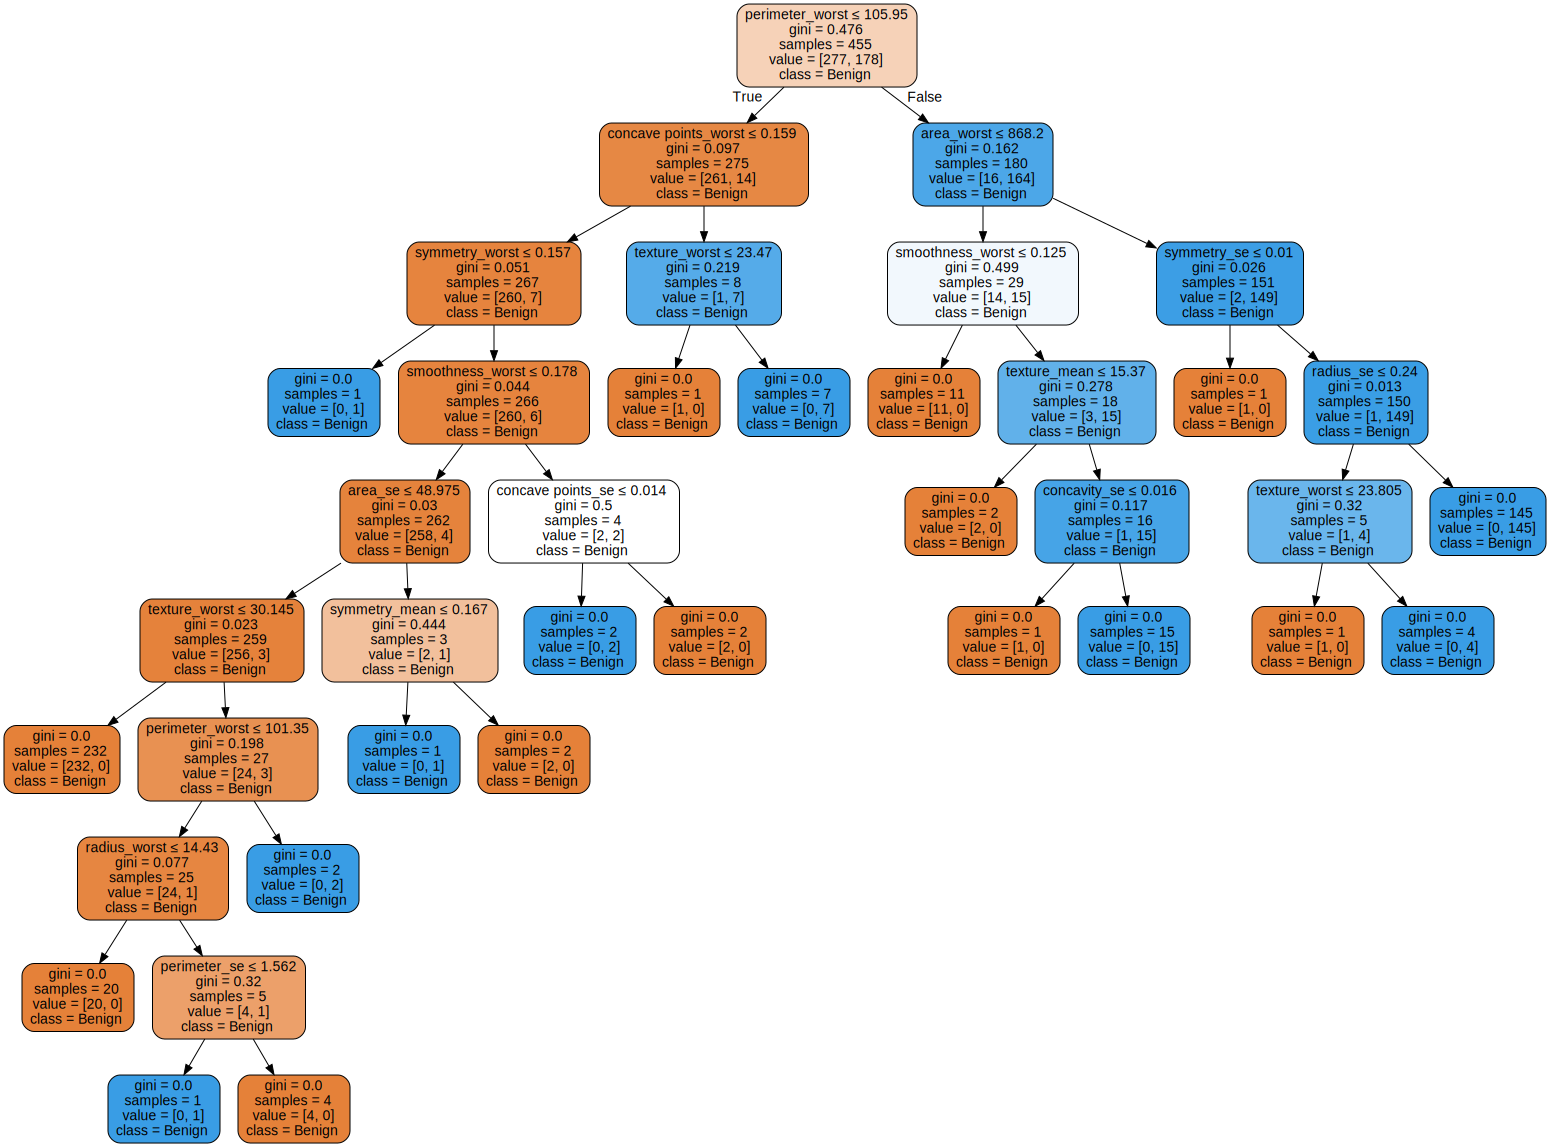

In [ ]:
# 输出决策树的图片
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names = feature_names,  
                      class_names = y_train_str,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

 **ID3熵预测二维属性组合：**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast Cancer-v2.csv to Breast Cancer-v2 (3).csv


In [ ]:
# 十幅二维图，预测算法使用ID3的熵
# https://blog.csdn.net/sinat_20350479/article/details/72453600
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

# 所有属性名 
# data_feature = [i for i in df.columns]
data_feature= ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
            'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
            'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
            'compactness_worst', 'concavity_worst', 'concave points_worst', 
            'symmetry_worst', 'fractal_dimension_worst']
#len(data_feature)
# 读取数据库
data = pd.read_csv('Breast Cancer-v2.csv', header=None)
x_prime = data[range(30)]
#x_prime[13] = x_prime[13].replace(0, 'No')
#x_prime[13] = x_prime[13].replace(1, 'Yes')
#x_prime[29]
y = pd.Categorical(data[30]).codes
#data[30]
#y

In [ ]:
# 组合 30C2 = 435
from itertools import combinations
l = [i for i in range(30)]
feature_pairs = list(combinations(l, 2))
feature_pairs = list(list(i) for i in feature_pairs)
#len(feature_pairs)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
0     569 non-null float64
1     569 non-null float64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null int64
dtypes: float64(30), int64(1)
memory usage: 137.9 KB


In [ ]:
# @title
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

temp_max=0
temp_i=0
temp_pair=[]

# 测试每个2D属性组合的准确率
for i, pair in enumerate(feature_pairs):
  # 准备数据
  print(i, pair)
  x = x_prime[pair]
  x_train, x_testt, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4)
  # 决策树学习
  clf = DecisionTreeClassifier()  # 默认Gini；criterion='entropy', min_samples_leaf=3
  clf.fit(x_train, y_train)
  
  # 训练集上的预测结果
  y_test_hat = clf.predict(x_testt)
  y_train_hat = clf.predict(x_train)
  # print y_test_hat,y_test
  # y = y.reshape(-1)
  c = np.count_nonzero(y_test_hat == y_test)  # 统计预测正确的个数
  d = np.count_nonzero(y_train_hat == y_train)

  # 找到最大准确率的组合
  setmax = 100 * float(c) / float(len(y_test))
  if(setmax > temp_max):
    temp_max = setmax
    temp_i = i
    temp_pair = pair

  # print 'c=',c
  print('\nFeature：  ', data_feature[pair[0]], '+', data_feature[pair[1]], end=" ")
  print('\nTestset prediction correct number:', c, '\nTrainset prediction correct number:', d, )
  # print ('\nacc:',accuracy_score(y_test,y_test_hat)
  print('Testset accuracy: %.2f%%' % (100 * float(c) / float(len(y_test))))
  print('Trainset accuracy: %.2f%%' % (100 * float(d) / float(len(y_train))))

print()
print(temp_max, temp_i, temp_pair)

0 [0, 1]

Feature：   radius_mean + texture_mean 
Testset prediction correct number: 97 
Trainset prediction correct number: 455
Testset accuracy: 85.09%
Trainset accuracy: 100.00%
1 [0, 2]

Feature：   radius_mean + perimeter_mean 
Testset prediction correct number: 99 
Trainset prediction correct number: 455
Testset accuracy: 86.84%
Trainset accuracy: 100.00%
2 [0, 3]

Feature：   radius_mean + area_mean 
Testset prediction correct number: 91 
Trainset prediction correct number: 455
Testset accuracy: 79.82%
Trainset accuracy: 100.00%
3 [0, 4]

Feature：   radius_mean + smoothness_mean 
Testset prediction correct number: 99 
Trainset prediction correct number: 455
Testset accuracy: 86.84%
Trainset accuracy: 100.00%
4 [0, 5]

Feature：   radius_mean + compactness_mean 
Testset prediction correct number: 102 
Trainset prediction correct number: 455
Testset accuracy: 89.47%
Trainset accuracy: 100.00%
5 [0, 6]

Feature：   radius_mean + concavity_mean 
Testset prediction correct number: 103 
Tr

54 [1, 27]

Feature：   texture_mean + concave points_worst 
Testset prediction correct number: 108 
Trainset prediction correct number: 455
Testset accuracy: 94.74%
Trainset accuracy: 100.00%


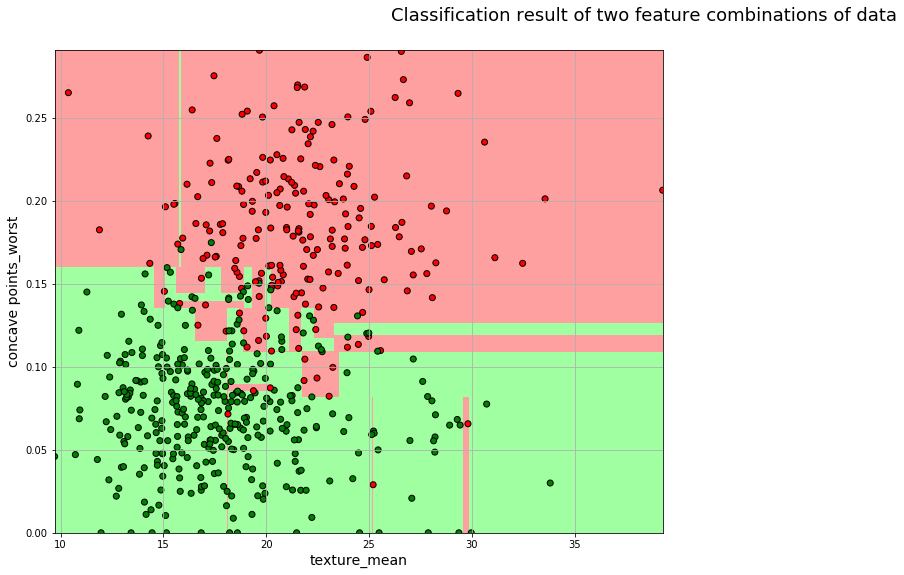

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 创建一个图形实例
plt.figure(figsize=(18, 30), facecolor='#FFFFFF')
# 准备数据
i = temp_i
pair = temp_pair
print(i, pair)
x = x_prime[pair]
x_train, x_testt, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=4)

# 决策树学习
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
    
# 画图
# 横纵各采样多少个值
N, M = 5000, 5000  
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                                            # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)                           # 测试点
    
# 训练集上的预测结果
y_test_hat = clf.predict(x_testt)
y_train_hat = clf.predict(x_train)
#print y_test_hat,y_test
#y = y.reshape(-1)
c = np.count_nonzero(y_test_hat == y_test)                              # 统计预测正确的个数
d = np.count_nonzero(y_train_hat == y_train)
#print 'c=',c
print ('\nFeature：  ', data_feature[pair[0]], '+', data_feature[pair[1]], end=" ")
print ('\nTestset prediction correct number:', c,'\nTrainset prediction correct number:',d,)
#print ('\nacc:',accuracy_score(y_test,y_test_hat)
print ( 'Testset accuracy: %.2f%%' % (100 * float(c) / float(len(y_test))) )
print ( 'Trainset accuracy: %.2f%%' % (100 * float(d) / float(len(y_train))) )
    
# 显示
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
y_hat = clf.predict(x_test)                                             # 预测值
#y_test_hat = clf.predict(x_testt)
y_hat = y_hat.reshape(x1.shape)                                         # 使之与输入的形状相同
plt.subplot(4, 2, 1)
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)                            # 预测值,画背景颜色
plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
plt.xlabel(data_feature[pair[0]], fontsize=14)
plt.ylabel(data_feature[pair[1]], fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
  
plt.suptitle('Classification result of two feature combinations of data', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()